In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.its.dal.ca/apache/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
# !ls
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install spark_sklearn


     |████████████████████████████████| 4.9MB 13.6MB/s 
  Created wheel for spark-sklearn: filename=spark_sklearn-0.3.0-cp36-none-any.whl size=30592 sha256=3ae7e84be94dfb38050ed1ec64beb16500fdc635f61177ec54de1157949e9eb7
  Stored in directory: /root/.cache/pip/wheels/64/28/e8/cb0250888675c630786f932dcc63ed96ac1aca299bcfb7235f
Successfully built spark-sklearn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

In [0]:
#import library

import time
from scipy import stats
import pyspark
from pyspark import SparkContext, SparkConf
sc = pyspark.SparkContext()
import os
#import keras
#from keras.callbacks import ModelCheckpoint
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
training = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/training/trainingSet_noEmpty.csv")
testing = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/testing/testingSet_noEmpty.csv")

print(training.shape)
print(training.columns)
print()
print(testing.shape)
print(testing.columns)

(2690, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)

(1140, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)


In [0]:
# convert back those attribute to int

training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

In [0]:
training.iloc[:,65:122] = training.iloc[:,65:122].astype(int)
testing.iloc[:,65:122] = testing.iloc[:,65:122].astype(int)

In [0]:
training.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)
testing.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)

In [0]:
training['FTR'] = training['FTR'].map({'A':0,'D':1,'H':2})
testing['FTR'] = testing['FTR'].map({'A':0,'D':1,'H':2})

In [0]:
print(training.shape)
print(testing.shape)

(2690, 123)
(1140, 123)


In [0]:
testing = testing[training.columns.values]

In [0]:
training.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
testing.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
data = pd.concat([training,testing])
data.shape

(3830, 123)

In [0]:
X = data.drop(['FTHG'],axis =1)
y = data['FTHG']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

In [0]:
# lasso- feature selection
# https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
# https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [0]:
feature_idx = sel_.get_support()
feature_idx

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [0]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 122
selected features: 120


In [0]:
pd.set_option('display.max_colwidth', -1)
modelCoeff = np.transpose(sel_.estimator_.coef_)[np.where(sel_.estimator_.coef_ != 0)[1]]
col = X_train.keys()[np.where(sel_.estimator_.coef_ != 0)[1]]
thisParamsList = pd.DataFrame(zip(col, modelCoeff), columns = ['Feature','Coefficient'])

In [0]:
thisParamsList.head(10)

Feature                                                                                                                                                                                                     Coefficient
0  Year    [-0.006994297442367226, -0.05275598055910208, 0.08169221921312068, 0.0012605867485133736, 0.008367626757886616, 0.0294768756027442, -0.01204611511286864, 0.3642445329633207, 0.0, 0.0]                       
1  Day     [0.10329886866553399, -0.058253205502521006, 0.02792004028054931, 0.02087784373829971, 0.022324995209498245, -0.1067389594182642, -0.1373756801719077, 0.0, 0.0, 0.0]                                         
2  FTAG    [-1.9445843479457277, -0.07000463539559067, 0.7564781030865263, 1.1757594960575035, 0.47516191881370556, 0.5217705388008524, 0.0, 0.0, 0.0, 0.0]                                                              
3  HTHG    [-5.881658555152308, -1.070667668566073, -0.40979034423233995, 0.21128540286798173, 0.3311175783722389, 0.6730846303041229, 1.28624607526411, 0.245791240820587, 0.494174200677674, 0.23837404886074226]      
4  HTAG    [0.4850975467135092, 0.37131913120674365, 0.30094727497212115, -0.04291376509629676, 0.10510160951767512, -0.028595711713237378, 0.0, 0.0, 0.13918840906924695, 0.16607540741035715]                          
5  HS      [0.23290908901790003, 0.14100670190453207, -0.1500230878246943, -0.00847797399201429, 0.0025439260753133807, 0.02344254397290938, 0.0, -0.3624634862797398, 0.0, 0.03340435022207767]                         
6  AS      [0.0386662040358437, 0.019333322519540785, -0.07219076518019825, -0.05441247858741255, 0.15569167688016755, 0.0, 0.0, 0.0, 0.0, 0.0]                                                                          
7  HST     [-0.935207297238527, -0.23553350611532295, 0.006241222681582317, 0.10779168342121939, 0.6305491246402684, 0.6841037331574865, 0.6203130550138256, 1.4942278669305145, 0.6326516840380533, 0.00427208659266986]
8  AST     [0.08423625778897749, -0.10079824628007072, 0.09179006349403546, 0.10669874592720924, 0.05503886995167316, -0.776808636435417, 0.0, 0.0, 0.0, 0.0]                                                            
9  HF      [0.05011057709818621, 0.055112185161534155, -0.02752432774174193, -0.020332434691246112, -0.2509587529771767, -0.0025785416870577633, 0.0, 0.0, -0.08208780323610905, 0.0]

In [0]:
feature_name = X_train.columns[feature_idx]
feature_name

Index(['Year', 'Month', 'Day', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST',
       'AST',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=120)

In [0]:
newXtrain = X_train[feature_name]

newXtrain.shape

(2681, 120)

In [0]:
newXtest = X_test[feature_name]

newXtest.shape

(1149, 120)

In [0]:
import time
from sklearn.ensemble import RandomForestClassifier
import spark_sklearn
#from spark_sklearn import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
#import xgboost as xgb

In [0]:
def metrics_calculation(model_name,Y_true,Y_predict):
  #roc=roc_auc_score(Y_true, Y_predict)
  accuracy = accuracy_score(Y_true, Y_predict)
  precision = precision_score(Y_true, Y_predict,average=None)
  recall = recall_score(Y_true, Y_predict,average=None)
  f1 = f1_score(Y_true, Y_predict,average=None)
  metrics=  pd.DataFrame([[model_name,accuracy,precision,recall,f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
  return metrics

In [0]:
model_results = []
models = {}
confusion_matrices = []
time_results=[]

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
parameters = {
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10], 
    'min_samples_split':[2,4,6,8,10],
    'criterion': ['gini','entropy']
}

In [0]:
start = time.time()
dt_model = DecisionTreeClassifier()
dt = GridSearchCV(estimator=dt_model,cv=5,param_grid=parameters,n_jobs=-1)
dt.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("DecisionTreeClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 54.96599459648132 seconds


[('DecisionTreeClassifier', 54.96599459648132)]

In [0]:
# get best parameters
print(dt.best_params_)
print(dt.best_score_)
print(dt.best_estimator_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.6855650876538605
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [0]:
models['dt'] = dt
predYtest = dt.predict(newXtest)
model_results.append(metrics_calculation('Decision Tree',y_test,predYtest))
model_results

[           Model  ...                                                                                                                                   F1 Score
 0  Decision Tree  ...  [0.8719999999999999, 0.7739557739557739, 0.6678966789667897, 0.4137931034482759, 0.36363636363636365, 0.26666666666666666, 0.0, 0.0, 0.0]
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix
print('Decision Tree: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("DecisionTreeClassifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

Decision Tree:  [[218  24   0   0   0   0   0   0   0]
 [ 37 315  15   3   0   0   0   0   0]
 [  3  80 181  20   1   0   0   0   0]
 [  0  23  39  54  13   3   0   0   0]
 [  0   1  16  33  22   5   0   0   0]
 [  0   1   5  12   4   6   0   0   0]
 [  0   0   1   6   3   1   0   0   0]
 [  0   0   0   1   1   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]]


[('DecisionTreeClassifier',
  array([[218,  24,   0,   0,   0,   0,   0,   0,   0],
         [ 37, 315,  15,   3,   0,   0,   0,   0,   0],
         [  3,  80, 181,  20,   1,   0,   0,   0,   0],
         [  0,  23,  39,  54,  13,   3,   0,   0,   0],
         [  0,   1,  16,  33,  22,   5,   0,   0,   0],
         [  0,   1,   5,  12,   4,   6,   0,   0,   0],
         [  0,   0,   1,   6,   3,   1,   0,   0,   0],
         [  0,   0,   0,   1,   1,   1,   0,   0,   0],
         [  0,   0,   0,   0,   0,   1,   0,   0,   0]]))]

In [0]:
# Logistic Regression
parameters = {
  'C': [0.001, 0.01, 0.1, 1, 10], 
  'class_weight': [None, 'balanced'], 
  'penalty': ['l1', 'l2']
}

In [0]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr_model = LogisticRegression()
lr = GridSearchCV(estimator=lr_model,param_grid = parameters,cv=5,n_jobs=-1)
lr.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("LogisticRegression",finish - start))
time_results

Time required to do Parallel Grid Search CV: 264.7040283679962 seconds


[('DecisionTreeClassifier', 54.96599459648132),
 ('LogisticRegression', 264.7040283679962)]

In [0]:
# get best parameters
print(lr.best_params_)
print(lr.best_score_)
print(lr.best_estimator_)

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}
0.586721372622156
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [0]:
models['lr'] = lr
predYtest = lr.predict(newXtest)
model_results.append(metrics_calculation('Logistic Regression',y_test,predYtest))
model_results

[           Model  ...                                                                                                                                   F1 Score
 0  Decision Tree  ...  [0.8719999999999999, 0.7739557739557739, 0.6678966789667897, 0.4137931034482759, 0.36363636363636365, 0.26666666666666666, 0.0, 0.0, 0.0]
 
 [1 rows x 5 columns],
                  Model  ...                                                                                                                                      F1 Score
 0  Logistic Regression  ...  [0.8352490421455938, 0.7005208333333334, 0.5377643504531723, 0.1990049751243781, 0.0425531914893617, 0.1142857142857143, 0.0, 0.0, 0.0, 0.0]
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('Logistic Regression: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("LogisticRegression",confusion_matrix(y_test,predYtest)))
confusion_matrices

Logistic Regression:  [[218  17   7   0   0   0   0   0   0   0]
 [ 56 269  40   2   2   1   0   0   0   0]
 [  6  93 178   4   3   1   0   0   0   0]
 [  0  15  94  20   2   1   0   0   0   0]
 [  0   3  40  30   2   1   0   0   1   0]
 [  0   0  16   5   5   2   0   0   0   0]
 [  0   1   2   6   1   1   0   0   0   0]
 [  0   0   0   2   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0]]


[('DecisionTreeClassifier',
  array([[218,  24,   0,   0,   0,   0,   0,   0,   0],
         [ 37, 315,  15,   3,   0,   0,   0,   0,   0],
         [  3,  80, 181,  20,   1,   0,   0,   0,   0],
         [  0,  23,  39,  54,  13,   3,   0,   0,   0],
         [  0,   1,  16,  33,  22,   5,   0,   0,   0],
         [  0,   1,   5,  12,   4,   6,   0,   0,   0],
         [  0,   0,   1,   6,   3,   1,   0,   0,   0],
         [  0,   0,   0,   1,   1,   1,   0,   0,   0],
         [  0,   0,   0,   0,   0,   1,   0,   0,   0]])),
 ('LogisticRegression',
  array([[218,  17,   7,   0,   0,   0,   0,   0,   0,   0],
         [ 56, 269,  40,   2,   2,   1,   0,   0,   0,   0],
         [  6,  93, 178,   4,   3,   1,   0,   0,   0,   0],
         [  0,  15,  94,  20,   2,   1,   0,   0,   0,   0],
         [  0,   3,  40,  30,   2,   1,   0,   0,   1,   0],
         [  0,   0,  16,   5,   5,   2,   0,   0,   0,   0],
         [  0,   1,   2,   6,   1,   1,   0,   0,   0,   0],
         [  0,

In [0]:
#XGBoost
#https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
#https://www.datacamp.com/community/tutorials/xgboost-in-python

parameters = [
    {'objective': ['reg:logistic'],
     'learning_rate': [0.01, 0.05, 0.1],
     'n_estimators': [10, 20, 40, 80, 100],
     'max_depth': [3,5,10],
     'gamma': [1,3,5,10],
     'colsample_bytree': [0.3, 0.5, 0.8]},
]

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
#from sklearn.cross_validation import *
from sklearn.model_selection import GridSearchCV

start = time.time()
xgb_model = xgb.XGBClassifier()
#gs_xgbc = spark_sklearn.GridSearchCV(sc,estimator=xgbc,param_grid = parameters,cv=5,n_jobs=-1)
xgbc = GridSearchCV(estimator=xgb_model,param_grid = parameters,cv=5,n_jobs=-1)
xgbc.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("XGBoost Classifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 6091.9336178302765 seconds


[('DecisionTreeClassifier', 54.96599459648132),
 ('LogisticRegression', 264.7040283679962),
 ('XGBoost Classifier', 6091.9336178302765)]

In [0]:
# get best parameters
print(xgbc.best_params_)
print(xgbc.best_score_)
print(xgbc.best_estimator_)

{'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 40, 'objective': 'reg:logistic'}
0.6989929130921299
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=5,
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


In [0]:
models['xgbc'] = xgbc
predYtest = xgbc.predict(newXtest)
model_results.append(metrics_calculation('XGBC',y_test,predYtest))
model_results

[           Model  ...                                                                                                                                   F1 Score
 0  Decision Tree  ...  [0.8719999999999999, 0.7739557739557739, 0.6678966789667897, 0.4137931034482759, 0.36363636363636365, 0.26666666666666666, 0.0, 0.0, 0.0]
 
 [1 rows x 5 columns],
                  Model  ...                                                                                                                                      F1 Score
 0  Logistic Regression  ...  [0.8352490421455938, 0.7005208333333334, 0.5377643504531723, 0.1990049751243781, 0.0425531914893617, 0.1142857142857143, 0.0, 0.0, 0.0, 0.0]
 
 [1 rows x 5 columns],
   Model  ...                                                                                                                                   F1 Score
 0  XGBC  ...  [0.8764478764478764, 0.7762326169405814, 0.6631762652705061, 0.3665338645418326, 0.09259259259259259, 0.142857142857

In [0]:
# Confusion Matrix
print('XGBC: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("XGBoost Classifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

XGBC:  [[227  15   0   0   0   0   0   0   0]
 [ 43 307  17   2   1   0   0   0   0]
 [  5  77 190  12   1   0   0   0   0]
 [  1  20  50  46  13   2   0   0   0]
 [  0   2  21  46   5   3   0   0   0]
 [  0   0   8   9   8   3   0   0   0]
 [  0   0   2   4   2   3   0   0   0]
 [  0   0   0   0   1   2   0   0   0]
 [  0   0   0   0   0   1   0   0   0]]


[('DecisionTreeClassifier',
  array([[218,  24,   0,   0,   0,   0,   0,   0,   0],
         [ 37, 315,  15,   3,   0,   0,   0,   0,   0],
         [  3,  80, 181,  20,   1,   0,   0,   0,   0],
         [  0,  23,  39,  54,  13,   3,   0,   0,   0],
         [  0,   1,  16,  33,  22,   5,   0,   0,   0],
         [  0,   1,   5,  12,   4,   6,   0,   0,   0],
         [  0,   0,   1,   6,   3,   1,   0,   0,   0],
         [  0,   0,   0,   1,   1,   1,   0,   0,   0],
         [  0,   0,   0,   0,   0,   1,   0,   0,   0]])),
 ('LogisticRegression',
  array([[218,  17,   7,   0,   0,   0,   0,   0,   0,   0],
         [ 56, 269,  40,   2,   2,   1,   0,   0,   0,   0],
         [  6,  93, 178,   4,   3,   1,   0,   0,   0,   0],
         [  0,  15,  94,  20,   2,   1,   0,   0,   0,   0],
         [  0,   3,  40,  30,   2,   1,   0,   0,   1,   0],
         [  0,   0,  16,   5,   5,   2,   0,   0,   0,   0],
         [  0,   1,   2,   6,   1,   1,   0,   0,   0,   0],
         [  0,

In [0]:
# combine dataframes, each dataframe store the metrics of each classifier

df1 = pd.DataFrame(model_results[0])
df2 = pd.DataFrame(model_results[1])
df3 = pd.DataFrame(model_results[2])
frames = [df1, df2, df3]
result = pd.concat(frames)
result

Model  ...                                                                                                                                      F1 Score
0  Decision Tree        ...  [0.8719999999999999, 0.7739557739557739, 0.6678966789667897, 0.4137931034482759, 0.36363636363636365, 0.26666666666666666, 0.0, 0.0, 0.0]   
0  Logistic Regression  ...  [0.8352490421455938, 0.7005208333333334, 0.5377643504531723, 0.1990049751243781, 0.0425531914893617, 0.1142857142857143, 0.0, 0.0, 0.0, 0.0]
0  XGBC                 ...  [0.8764478764478764, 0.7762326169405814, 0.6631762652705061, 0.3665338645418326, 0.09259259259259259, 0.14285714285714285, 0.0, 0.0, 0.0]   

[3 rows x 5 columns]

In [0]:
# store training acc 
tr_score = []
tr_score.append(dt.best_score_)
tr_score.append(lr.best_score_)
tr_score.append(xgbc.best_score_)

In [0]:
# plot accuracy bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [ 'Decision Tree',  'Logisitic Regression', 'XGBoost Classifier']
accuracy = result['Accuracy']
train_acc = tr_score

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, train_acc, width, color = 'aqua', label = 'training')
rects2 = ax.bar(x + width, accuracy, width, color = 'orange', label = 'testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.set_title('Classifiers Performance')
plt.legend(bbox_to_anchor=(1.3,1))

plt.axhline(y=0.6,linewidth=1, color='black')
plt.show()

In [0]:
#visualisation of Decision Tree

In [0]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt.best_estimator_, out_file=None,
                          feature_names=newXtrain.columns.values,
                          class_names=['1','2','3','4','5','6','7','>=8'],
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)


In [0]:
graph.render('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/DT_FS=LASSO_FTHG',view=True)

'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/DT_FS=LASSO_FTHG.pdf'

In [0]:
#visualisation of Logistic Regression

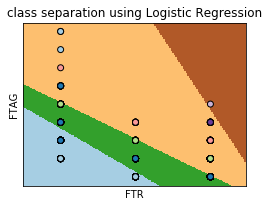

In [0]:
import seaborn as sb
# select FTHG and FTAG, two features with the highest feature importance score
X = newXtest[['FTR','FTAG']]
Y = y_test
# using the best parameters
logreg = LogisticRegression(C=10, class_weight = None , penalty = 'l1')
logreg.fit(X,Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('FTR')
plt.ylabel('FTAG')
plt.title('class separation using Logistic Regression')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
plt.show()
fig.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/LR_FS=LASSO_FTHG.jpeg',dpi=500,bbox_inches = 'tight')

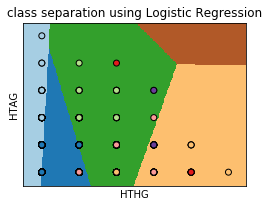

In [0]:
import seaborn as sb
# select FTHG and FTAG, two features with the highest feature importance score
X = newXtest[['HTHG','HTAG']]
Y = y_test
# using the best parameters
logreg = LogisticRegression(C=10, class_weight = None , penalty = 'l1')
logreg.fit(X,Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('HTHG')
plt.ylabel('HTAG')
plt.title('class separation using Logistic Regression')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
plt.show()
fig.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/LR_FS=LASSO_FTHG2.jpeg',dpi=500,bbox_inches = 'tight')

In [0]:
# visualisation of XGB Classifer

In [0]:
# https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/ 

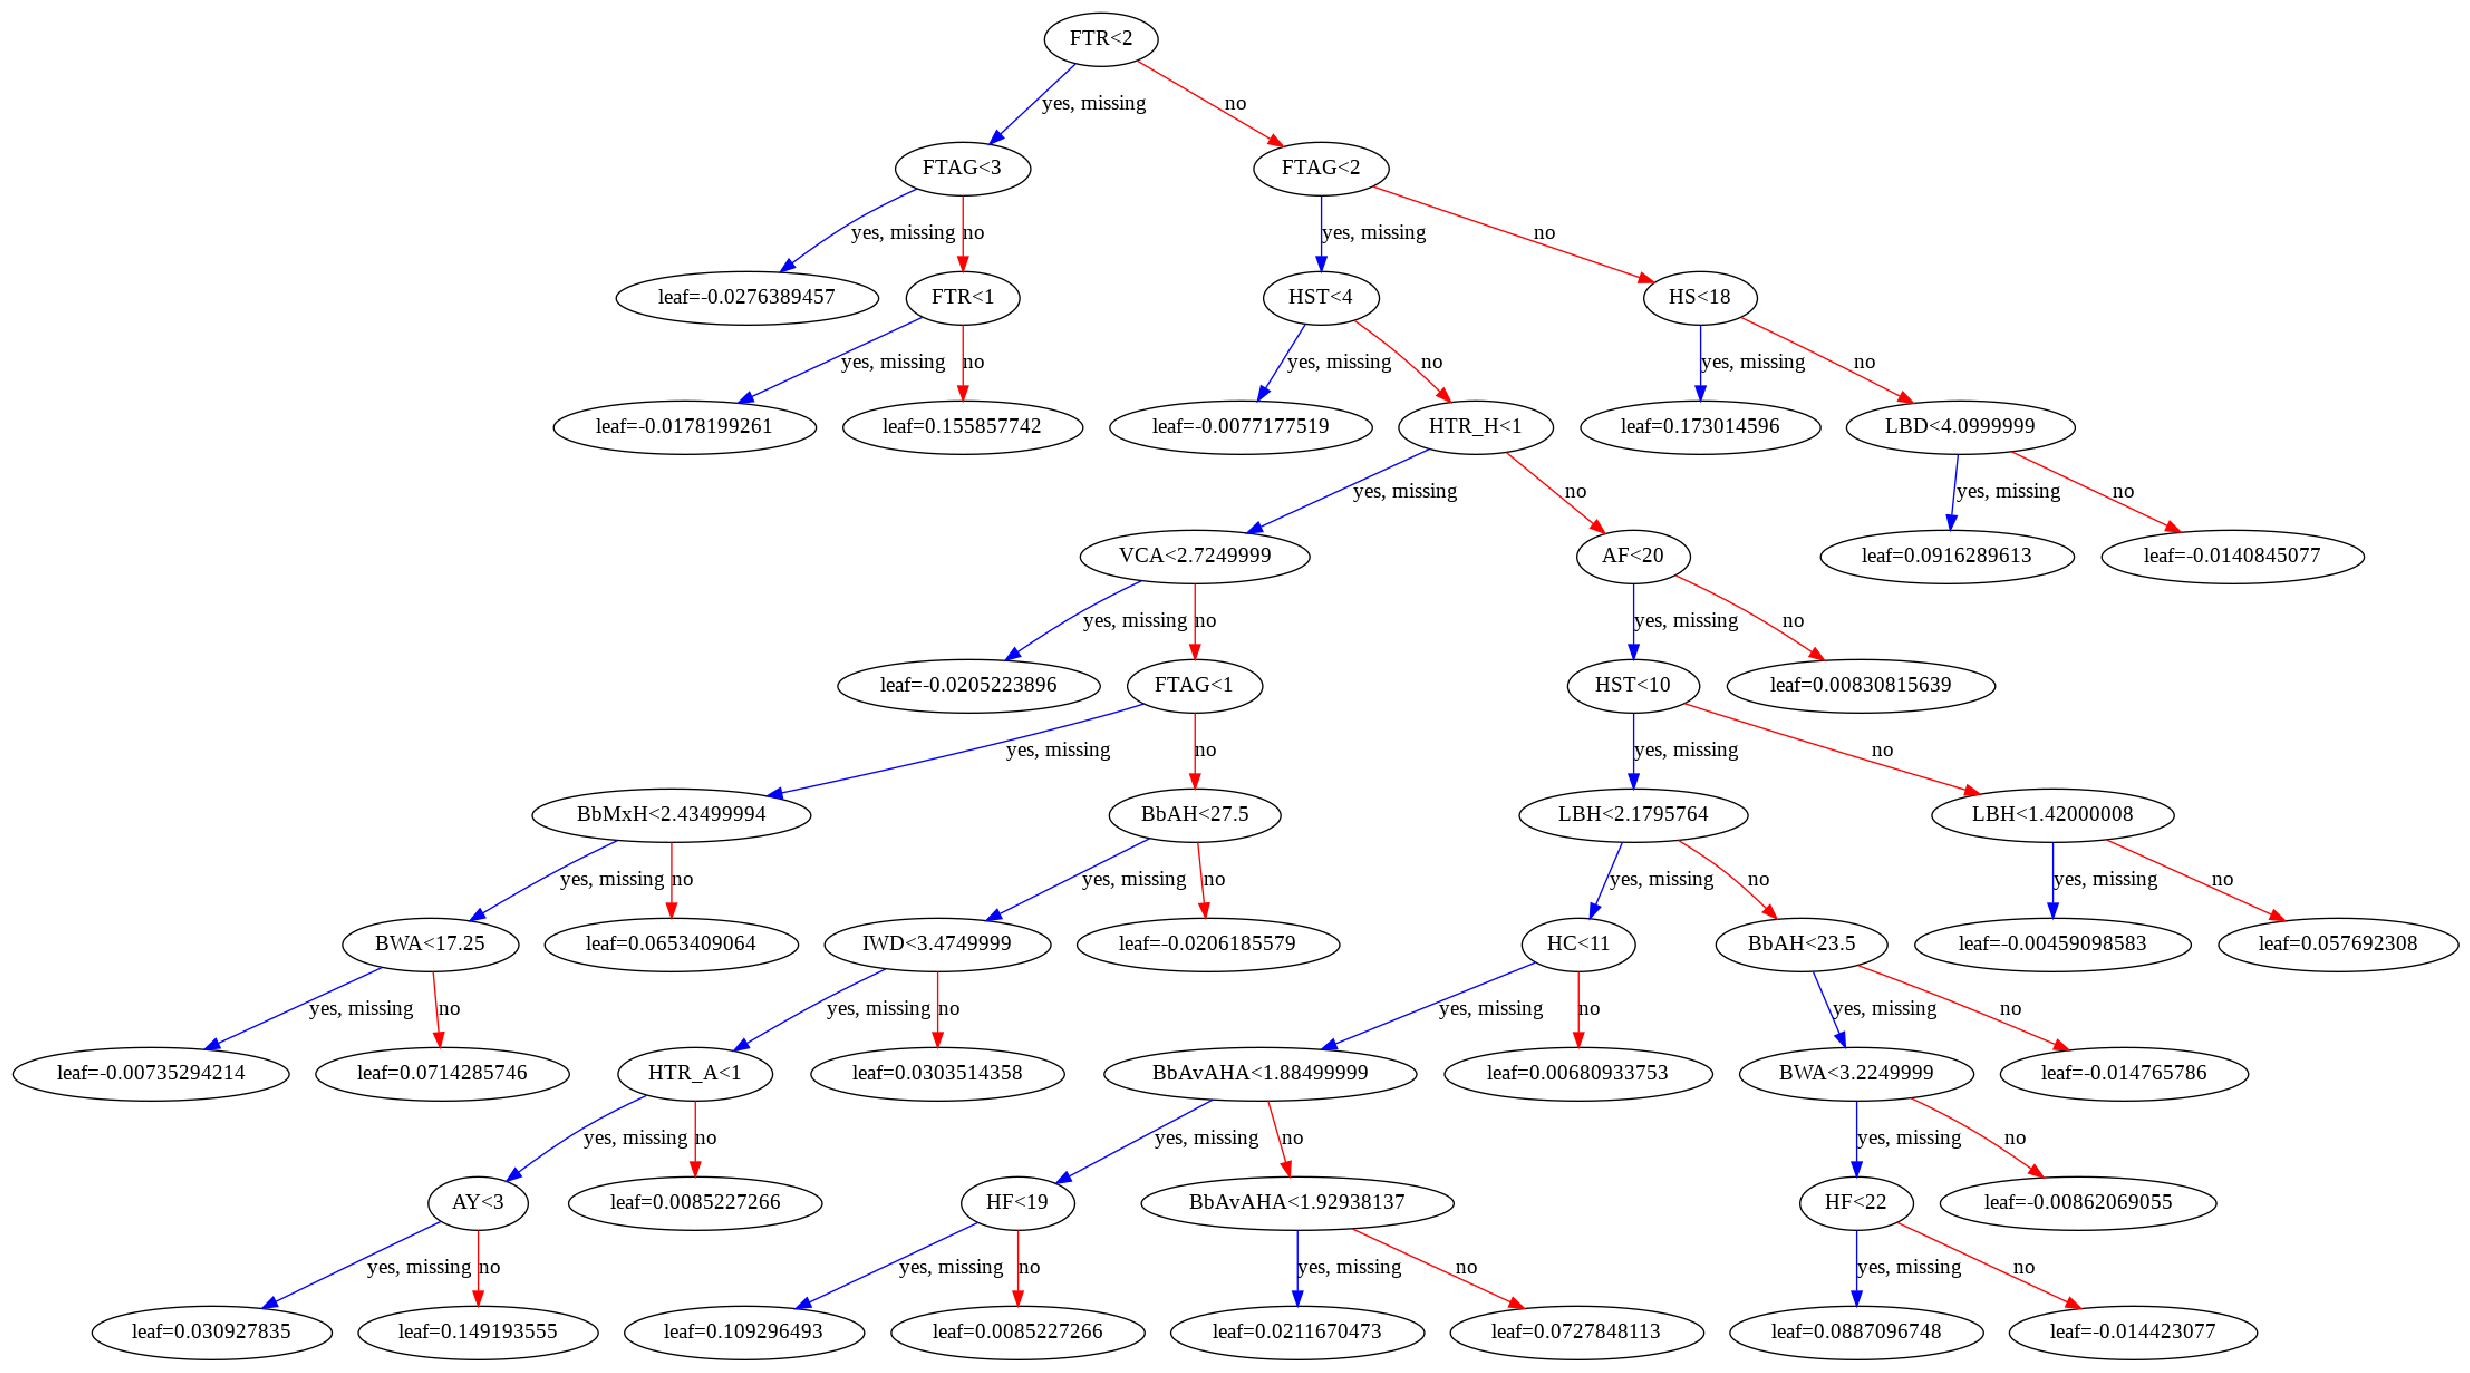

In [0]:
# plot single tree
from xgboost import plot_tree
plot_tree(xgbc.best_estimator_, num_trees=3)

fig2 = plt.gcf()
fig2.set_size_inches (45,25)

fig2.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/XGB_FS=LASSO_FTHG2.jpeg',dpi=500,bbox_inches = 'tight')
plt.show()


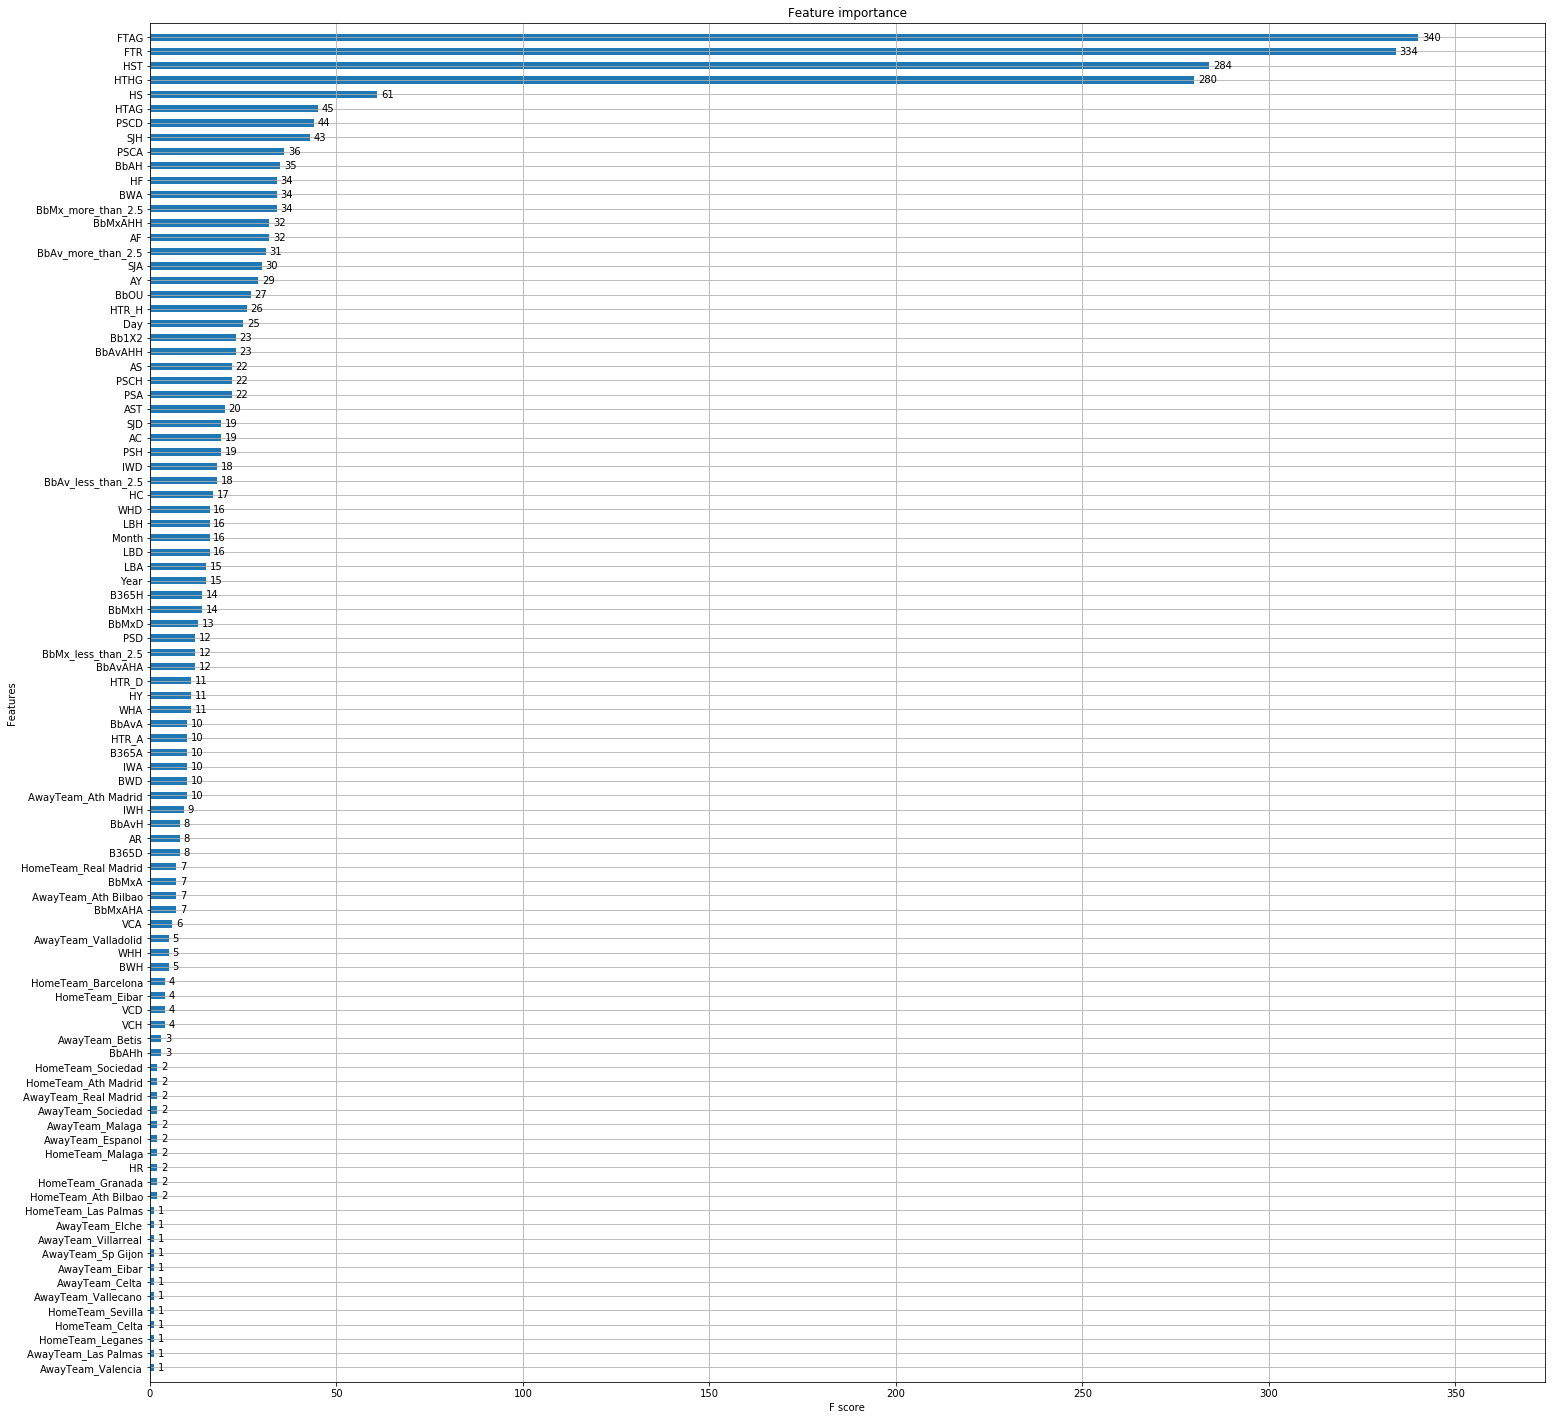

In [0]:
# plot feature_importance
fig,ax = plt.subplots(figsize=(25,25))
plot_importance(xgbc.best_estimator_,
                height=0.5,
                ax=ax)

plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/XGB_FS=LASSO_FTHG_FI.jpeg',dpi=500,bbox_inches = 'tight')
plt.show()

In [0]:
#https://medium.com/fintechexplained/how-to-save-trained-machine-learning-models-649c3ad1c018

In [0]:
# Save Model
from sklearn.externals import joblib 

dt = joblib.dump(dt,'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_DT' )
lr = joblib.dump(lr,'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_LR' )
xgb = joblib.dump(xgbc,'/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_XGB' )

In [0]:
dt, lr, xgb

(['/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_DT'],
 ['/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_LR'],
 ['/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_XGB'])

In [0]:
# Testing to load model for later use

In [0]:
# Load Model
xgb_fthg_lasso = joblib.load("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Model/Classifiers/FTHG_FS=LASSO_XGB")

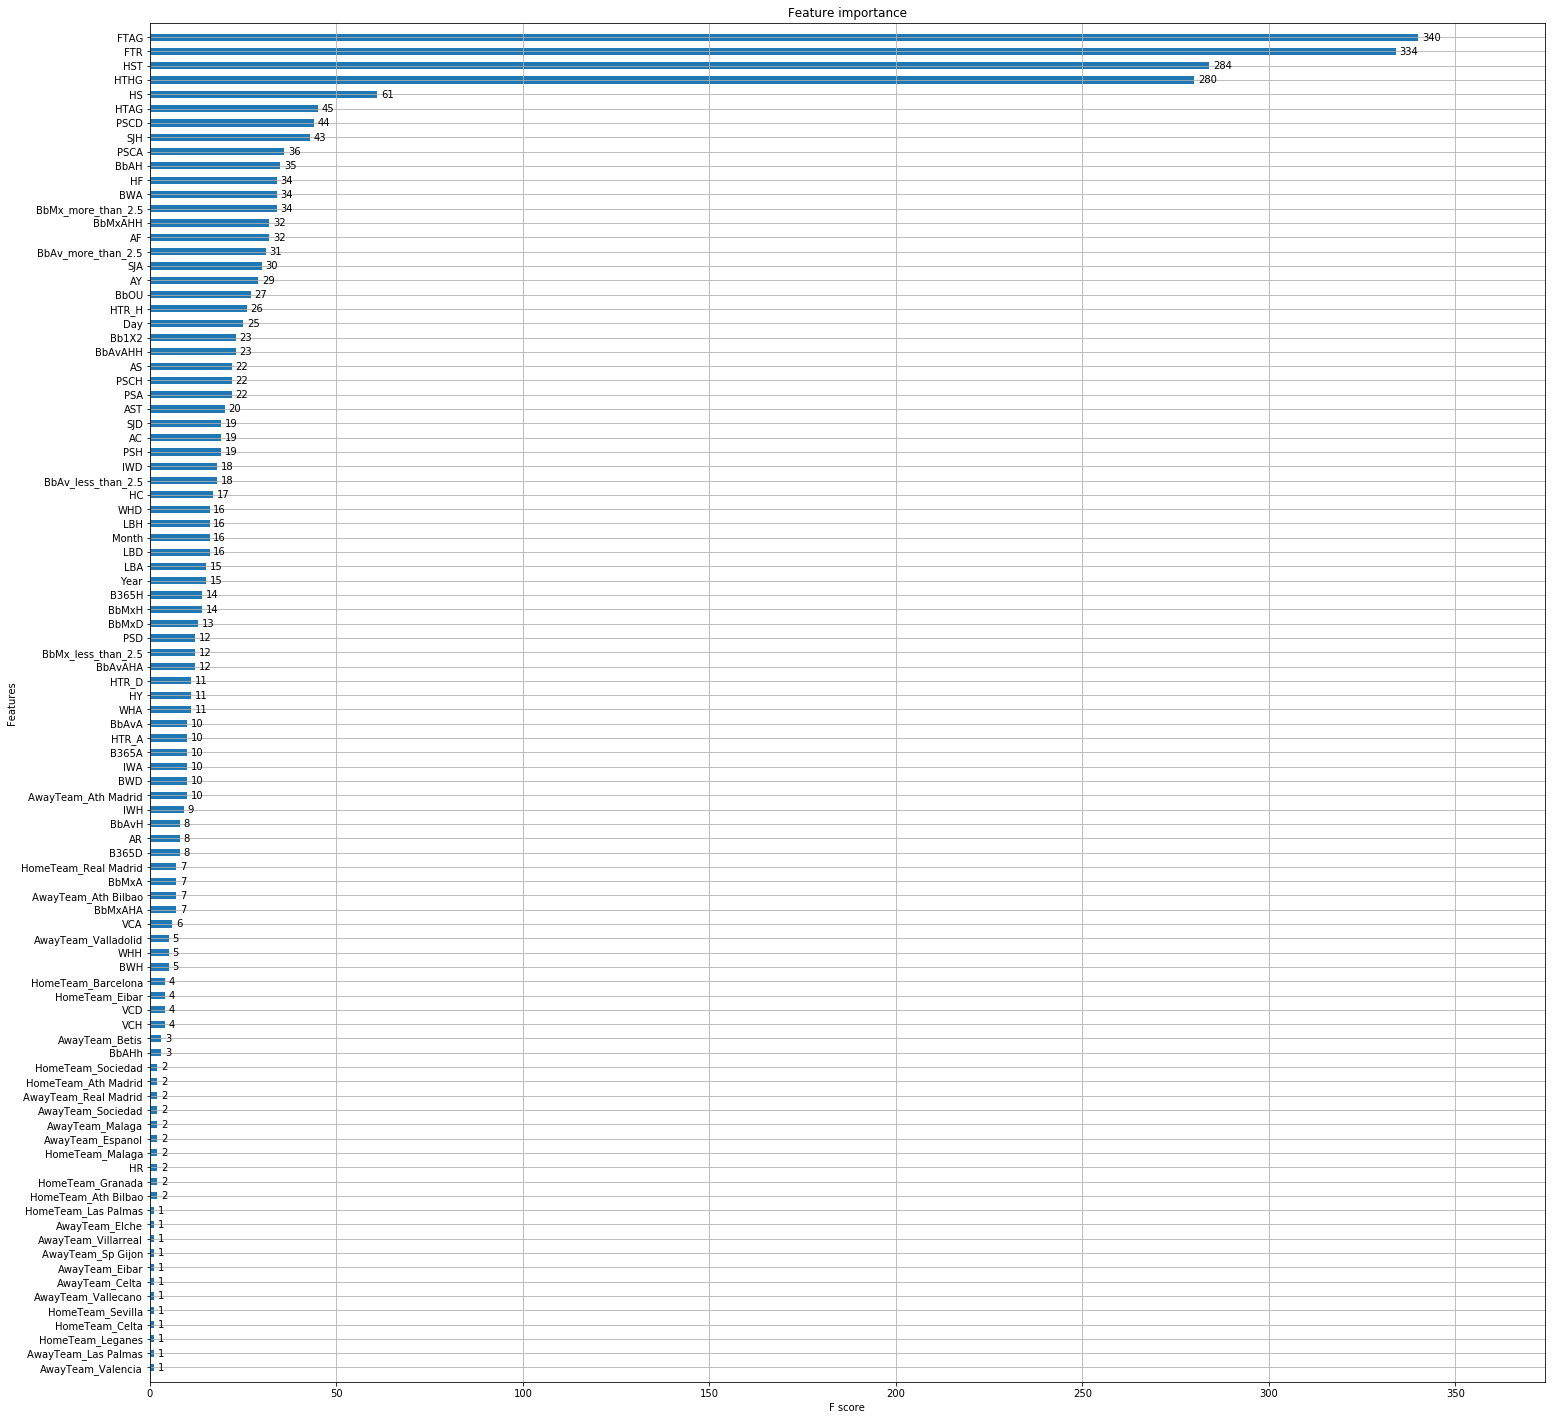

In [0]:
# plot feature_importance
fig,ax = plt.subplots(figsize=(25,25))
plot_importance(xgb_fthg_lasso.best_estimator_,
                height=0.5,
                ax=ax)

#plt.savefig('/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/graph/Phase II/XGB_FS=tree_FTAG_FI.jpeg',dpi=500,bbox_inches = 'tight')
plt.show()